In [620]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt

In [621]:
results = loadmat('yalefaces.mat')
X = results['X']


In [622]:
C = []
for i in range(100):
    C.append([])
    for j in range(100):
        C[i].append(np.dot(X[:, i].T, X[:, j]))
C = np.array(C)

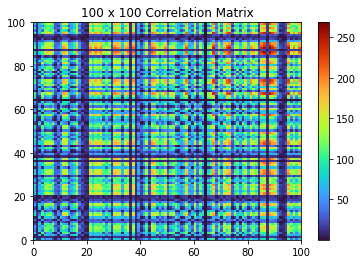

In [623]:
#calculating dot products

plt.pcolor(C, cmap="turbo")
plt.title("100 x 100 Correlation Matrix")
plt.colorbar()

In [624]:
correlations = {}
for i in range(100):
    for j in range(100):
        correlations[(i, j)] = C[i, j]

In [625]:
topFaces = sorted(correlations.items(), key=lambda x:x[1], reverse=True)

In [626]:
topFaces[-2]

((64, 54), 0.002161908881199547)

In [627]:
mostCor = topFaces[2]
leastCor = topFaces[-2]
print(f"Most highly correlated faces: {topFaces[2][0][0]} and {topFaces[2][0][1]}")
print(f"Most uncorrelated faces: {topFaces[-2][0][0]} and {topFaces[-2][0][1]}")

Most highly correlated faces: 86 and 88
Most uncorrelated faces: 64 and 54


Text(0.5, 0.98, 'Most highly correlated images')

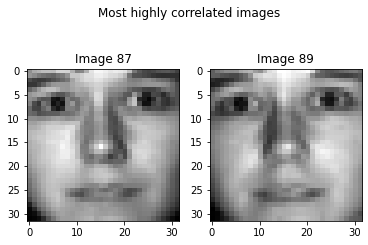

In [628]:
fig, axs = plt.subplots(1,2)
img86 = np.reshape(X[:, 86], (32, 32))
img88 = np.reshape(X[:, 88], (32, 32))
axs[0].imshow(img86, cmap='gray')
axs[1].imshow(img88, cmap='gray')
axs[0].set_title("Image 87")
axs[1].set_title("Image 89")
fig.suptitle("Most highly correlated images")

Text(0.5, 0.98, 'Least correlated images')

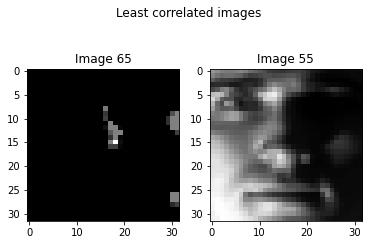

In [629]:
fig, axs = plt.subplots(1,2)
img64 = np.reshape(X[:, 64], (32, 32))
img54 = np.reshape(X[:, 54], (32, 32))
axs[0].imshow(img64, cmap='gray')
axs[1].imshow(img54, cmap='gray')
axs[0].set_title("Image 65")
axs[1].set_title("Image 55")
fig.suptitle("Least correlated images")

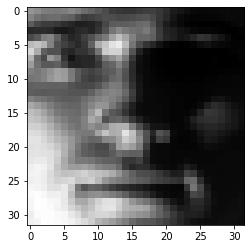

In [630]:
im14 = np.reshape(X[:, 54], (32, 32))
plt.imshow(im14, cmap='gray')

In [631]:
targets = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
C2 = []
for i in range(10):
    C2.append([])
    for j in range(10):
        C2[i].append(np.dot(X[:, targets[i]-1].T, X[:, targets[j]-1]))

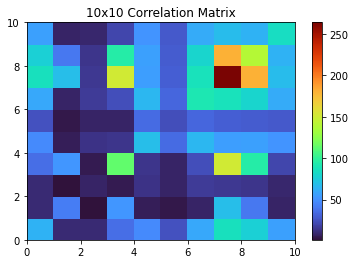

In [632]:
plt.pcolor(C2, cmap="turbo")
plt.title("10x10 Correlation Matrix")
plt.colorbar()

In [633]:
correlations2 = {}
for i in range(10):
    for j in range(10):
        correlations2[(i, j)] = C2[i][j]
topFaces2 = sorted(correlations2.items(), key=lambda x: x[1], reverse=True)
topFaces2[::-1]

[((2, 1), 1.5453726931949268),
 ((1, 2), 1.5453726931949268),
 ((5, 1), 3.7447156141868554),
 ((1, 5), 3.7447156141868554),
 ((3, 2), 4.680218245386394),
 ((2, 3), 4.680218245386394),
 ((4, 1), 5.665560841983858),
 ((1, 4), 5.665560841983858),
 ((6, 1), 7.903130526720496),
 ((1, 6), 7.903130526720496),
 ((2, 2), 7.919463247308745),
 ((5, 2), 8.369322616301446),
 ((2, 5), 8.369322616301446),
 ((5, 3), 8.410880730968863),
 ((3, 5), 8.410880730968863),
 ((9, 1), 8.608608167531724),
 ((1, 9), 8.608608167531724),
 ((9, 2), 8.740703094963504),
 ((2, 9), 8.740703094963504),
 ((1, 0), 9.905911368223764),
 ((0, 1), 9.905911368223764),
 ((2, 0), 10.632565599769338),
 ((0, 2), 10.632565599769338),
 ((4, 2), 13.022957816705144),
 ((2, 4), 13.022957816705144),
 ((4, 3), 14.041092308246837),
 ((3, 4), 14.041092308246837),
 ((8, 2), 14.222255382545193),
 ((2, 8), 14.222255382545193),
 ((7, 2), 15.618984164744347),
 ((2, 7), 15.618984164744347),
 ((6, 2), 16.457581218762044),
 ((2, 6), 16.457581218762

In [634]:
mostCor2 = topFaces2[1]
leastCor2 = topFaces2[-1]
print(f"Most highly correlated faces: {targets[topFaces2[1][0][0]]} and {targets[topFaces2[1][0][1]]}")
print(f"Most uncorrelated faces: {targets[topFaces2[-1][0][0]]} and {targets[topFaces2[-1][0][1]]}")

Most highly correlated faces: 87 and 314
Most uncorrelated faces: 512 and 313


Text(0.5, 0.98, 'Most highly correlated images')

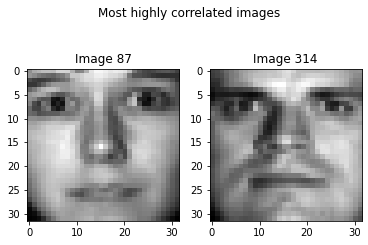

In [635]:
fig, axs = plt.subplots(1,2)
img87 = np.reshape(X[:, 86], (32, 32))
img314 = np.reshape(X[:, 313], (32, 32))
axs[0].imshow(img87, cmap='gray')
axs[1].imshow(img314, cmap='gray')
axs[0].set_title("Image 87")
axs[1].set_title("Image 314")
fig.suptitle("Most highly correlated images")

Text(0.5, 0.98, 'Least correlated images')

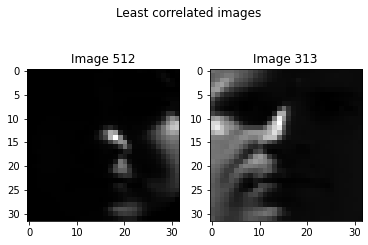

In [636]:
fig, axs = plt.subplots(1,2)
img512 = np.reshape(X[:, 511], (32, 32))
img313 = np.reshape(X[:, 312], (32, 32))
axs[0].imshow(img512, cmap='gray')
axs[1].imshow(img313, cmap='gray')
axs[0].set_title("Image 512")
axs[1].set_title("Image 313")
fig.suptitle("Least correlated images")

In [637]:
Y = np.matmul(X, X.T)

In [638]:
eigenVals, eigenVects = np.linalg.eigh(Y)

In [639]:
sortedEigenIndexs = eigenVals.argsort()[::-1]

In [640]:
eigenVals = eigenVals[sortedEigenIndexs]

In [641]:
eigenVects = eigenVects[:, sortedEigenIndexs]


In [642]:
first6 = eigenVects[:, :6]

In [643]:
first6

array([[-0.02384327,  0.04535378, -0.05653196,  0.04441826, -0.03378603,
         0.02207542],
       [-0.02576146,  0.04567536, -0.04709124,  0.05057969, -0.01791442,
         0.03378819],
       [-0.02728448,  0.04474528, -0.0362807 ,  0.05522219, -0.00462854,
         0.04487476],
       ...,
       [-0.02082937, -0.03737158, -0.06455006, -0.01006919,  0.06172201,
         0.03025485],
       [-0.0193902 , -0.03557383, -0.06196898, -0.00355905,  0.05796353,
         0.02850199],
       [-0.0166019 , -0.02965746, -0.05241684,  0.00040934,  0.05757412,
         0.00941028]])

In [644]:
#support vector machine
Uarr, Sarr, VHarr = np.linalg.svd(X)


In [645]:
#f
first6U = Uarr[:, :6]

In [646]:
v1 = first6[:, 0]
u1 = first6U[:, 0]


In [647]:
norm_diff = np.linalg.norm(np.abs(v1) - np.abs(u1))
print(norm_diff)

5.859925686842521e-16


In [648]:
total_var = np.sum(Sarr**2)
explainedVarRatios = (Sarr**2 / total_var)[:6]

In [649]:
for i in range(6):
    print(f"Percentage of variance captured by SVD mode {i+1}: {explainedVarRatios[i]*100}%")

Percentage of variance captured by SVD mode 1: 72.92756746909564%
Percentage of variance captured by SVD mode 2: 15.281762655694356%
Percentage of variance captured by SVD mode 3: 2.5667449429852685%
Percentage of variance captured by SVD mode 4: 1.8775248514714775%
Percentage of variance captured by SVD mode 5: 0.6393058444446524%
Percentage of variance captured by SVD mode 6: 0.592431441503493%


In [650]:
print(f"Percentage of Variance Captured by First 6 SVD Modes: {explainedVarRatios * 100}")

Percentage of Variance Captured by First 6 SVD Modes: [72.92756747 15.28176266  2.56674494  1.87752485  0.63930584  0.59243144]


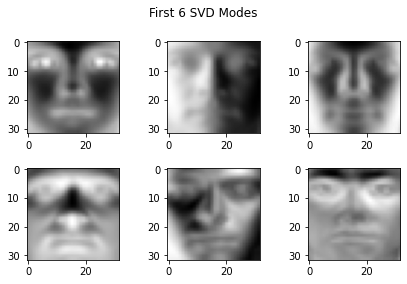

In [651]:
fig, axs = plt.subplots(2, 3)
fig.suptitle("First 6 SVD Modes")
fig.tight_layout()
axs[0, 0].imshow(first6U[:, 0].reshape(32, 32), cmap="gray")
axs[0, 1].imshow(first6U[:, 1].reshape(32, 32), cmap="gray")
axs[0, 2].imshow(first6U[:, 2].reshape(32, 32), cmap="gray")
axs[1, 0].imshow(first6U[:, 3].reshape(32, 32), cmap="gray")
axs[1, 1].imshow(first6U[:, 4].reshape(32, 32), cmap="gray")
axs[1, 2].imshow(first6U[:, 5].reshape(32, 32), cmap="gray")
